In [2]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import importlib.util
import numpy as np 
import seaborn as sns
import pickle
import scipy.stats as stats
from scipy.optimize import curve_fit
from numpy import array 
from statsmodels.stats.weightstats import ttest_ind

In [2]:
anor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/nor.pickle', "rb"))
arth = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/rheumatoid_arthritis.pickle', "rb"))

In [3]:
down = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/Down_syndrome.pkl', "rb"))
ibs = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/IBS.pkl', "rb"))
ibs_age = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/IBS ages.xlsx','Sheet1')
ms = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/MS.pickle', "rb"))

In [4]:
parknor = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/norm_park.pickle', "rb"))
park = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/dis_park.pickle', "rb"))
werner = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/Werner_Syndrome.pickle', "rb")) 

In [6]:
hiv = pickle.load(open('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/epigentic disease/HIV_male.pkl', "rb"))

In [7]:
down_nor = down.iloc[26:, :]
down_dis = down.iloc[:26, :]

In [8]:
anor = anor.rename(columns={'age':'Age'})
arth = arth.rename(columns={'age':'Age'})
park= park.rename(columns={'age':'Age'})
parknor= parknor.rename(columns={'age':'Age'})

In [9]:
werner = werner.rename(columns={'age':'Age'})
mask = ~werner.index.isin([('GSE100825', 'GSM2694066'), ('GSE100825', 'GSM2694068'),('GSE100825', 'GSM2694070')])
Werner_Syndrome_h = werner.loc[mask]
mask = ~werner.index.isin([('GSE100825', 'GSM2694067'), ('GSE100825', 'GSM2694069'),('GSE100825', 'GSM2694071')])
Werner_Syndrome_d = werner.loc[mask]

In [10]:
ms = ms.rename(columns={'age':'Age'})
ms['Age'] = ms['Age'].astype(str).astype(int)
ms_nor = ms[ms['status']=='Healthy control']
ms_dis = ms[ms['status']!='Healthy control']
ibs_age = ibs_age.set_index('Unnamed: 0')
ibs['Age'] = ibs_age['Age']
ibs['status'] = ibs_age['Disease State']
ibs_nor = ibs[ibs['status']=='HC']
ibs_dis = ibs[ibs['status']!='HC']

In [11]:
combine_healthy = pd.concat([parknor, anor, ms_nor, ibs_nor, down_nor, Werner_Syndrome_h], ignore_index=True, sort=False)
combine_dis = pd.concat([park, arth, ms_dis, ibs_dis, down_dis, Werner_Syndrome_d,hiv], ignore_index=True, sort=False)
combine_dis_nohiv = pd.concat([park, arth, ms_dis, ibs_dis, down_dis, Werner_Syndrome_d], ignore_index=True, sort=False)


In [12]:
combine_healthy_common = combine_healthy.dropna(axis=1)

In [13]:
# white's test
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

In [3]:
hannum_cpg_pub = pd.read_excel (r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/hannum_model.xlsx','Model_PrimaryData')
Phenoage_cpg = pd.read_csv(r'/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/PhenoAge_513CpG.csv')


In [12]:
PACEcpgs = pd.read_excel('/Users/xiaoyuemei/Desktop/SynologyDrive/MXY/conboy_lab_codeSource/pacecpg.xlsx')
PACEcpgs = PACEcpgs.iloc[1::2]

In [13]:
PACEcpgs = PACEcpgs.rename(columns={'Intercept':'cpg'})
PACEcpgs['coefficient'] =PACEcpgs.iloc[:,1]

In [22]:
combine_healthy_com_han = combine_healthy_common[combine_healthy_common.columns.intersection(hannum_cpg_pub['Marker']).to_list()]
combine_healthy_com_han['Age'] = combine_healthy_common['Age'].round()
h_com_han_sd = combine_healthy_com_han.groupby('Age').std().dropna(axis=0)
#by dropping ages with only one idnvidual, we still have 832 individuals
combine_healthy_com_pheno = combine_healthy_common[combine_healthy_common.columns.intersection(Phenoage_cpg.iloc[1:,:]['CpG'].to_list()).to_list()]
combine_healthy_com_pheno['Age'] = combine_healthy_common['Age'].round()
h_com_pheno_sd = combine_healthy_com_pheno.groupby('Age').std().dropna(axis=0)
combine_healthy_com_pace = combine_healthy_common[combine_healthy_common.columns.intersection(PACEcpgs['cpg'].to_list()).to_list()]
combine_healthy_com_pace['Age'] = combine_healthy_common['Age'].round()
h_com_pace_sd = combine_healthy_com_pace.groupby('Age').std().dropna(axis=0)


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_745/1424706505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_healthy_com_han['Age'] = combine_healthy_common['Age'].round()
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_745/1424706505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_healthy_com_pheno['Age'] = combine_healthy_common['Age'].round()
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_745/1424706505.py:9: SettingWithCopyWarning: 
A value is 

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cpg_lst = []
R_square = []
for i in combine_healthy_com_han: 
    x, y = array(combine_healthy_com_han[i]).reshape(-1,1), array(combine_healthy_com_han['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
    

In [51]:
CpG_R = CpG_R.iloc[:-1,:].set_index('cpg')
CpG_R['weight'] = hannum_cpg_pub.set_index('Marker')['Coefficient']

In [61]:
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,64).tolist()

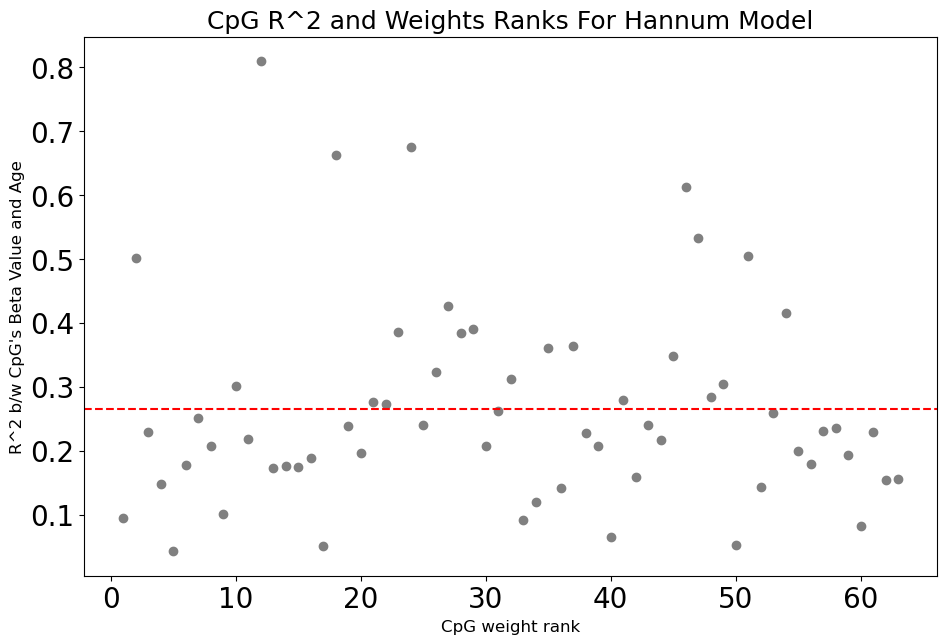

In [65]:
plt.figure(figsize=(11, 7))
plt.scatter(CpG_R['rank'], 
            CpG_R['R square'], color = 'gray')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CpG R^2 and Weights Ranks For Hannum Model", fontsize=18)
plt.xlabel('CpG weight rank', fontsize=12)
plt.ylabel("R^2 b/w CpG's Beta Value and Age", fontsize=12)
plt.axhline(CpG_R['R square'].mean(),color = 'r',linestyle='dashed')
plt.show()



In [92]:
cpg_lst = []
R_square = []
for i in combine_healthy_com_pheno: 
    x, y = array(combine_healthy_com_pheno[i]).reshape(-1,1), array(combine_healthy_com_pheno['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
CpG_R = CpG_R.iloc[:-1,:].set_index('cpg')
CpG_R['weight'] = Phenoage_cpg.iloc[1:,:].set_index('CpG')['Univariate Age Correlation']
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,512).tolist()



In [93]:
CpG_R

,R square,weight,rank
cpg,,,
cg22736354,0.240529,0.763218,1
cg06493994,0.188938,0.667921,2
cg21296230,0.196658,0.661585,3
cg18267374,0.085655,0.618976,4
cg21801378,0.116562,0.583732,5
...,...,...,...
cg09809672,0.364467,-0.644367,507
cg19722847,0.303988,-0.646780,508
cg02228185,0.222079,-0.650281,509


In [71]:
cpg_lst = []
R_square = []
for i in combine_healthy_com_pace: 
    x, y = array(combine_healthy_com_pace[i]).reshape(-1,1), array(combine_healthy_com_pace['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
CpG_R = CpG_R.iloc[:-1,:].set_index('cpg')
CpG_R['weight'] = PACEcpgs.set_index('cpg')['coefficient']
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,174).tolist()


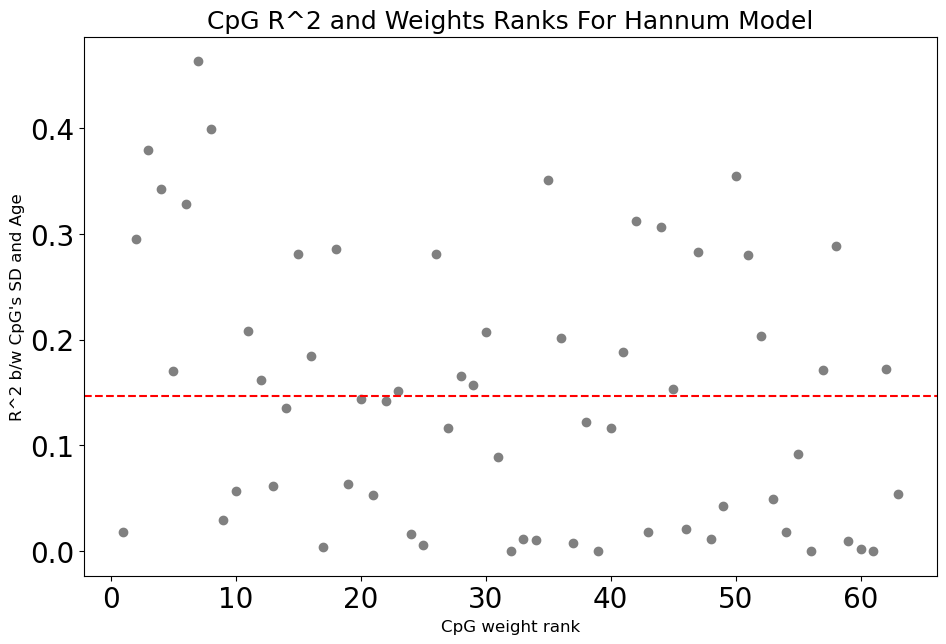

In [98]:
cpg_lst = []
R_square = []
for i in h_com_han_sd: 
    x, y = array(h_com_han_sd[i]).reshape(-1,1), array(h_com_han_sd.reset_index()['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
CpG_R = CpG_R.set_index('cpg')
CpG_R['weight'] = hannum_cpg_pub.set_index('Marker')['Coefficient']
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,64).tolist()
plt.figure(figsize=(11, 7))
plt.scatter(CpG_R['rank'], 
            CpG_R['R square'], color = 'gray')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CpG R^2 and Weights Ranks For Hannum Model", fontsize=18)
plt.xlabel('CpG weight rank', fontsize=12)
plt.ylabel("R^2 b/w CpG's SD and Age", fontsize=12)
plt.axhline(CpG_R['R square'].mean(),color = 'r',linestyle='dashed')
plt.show()




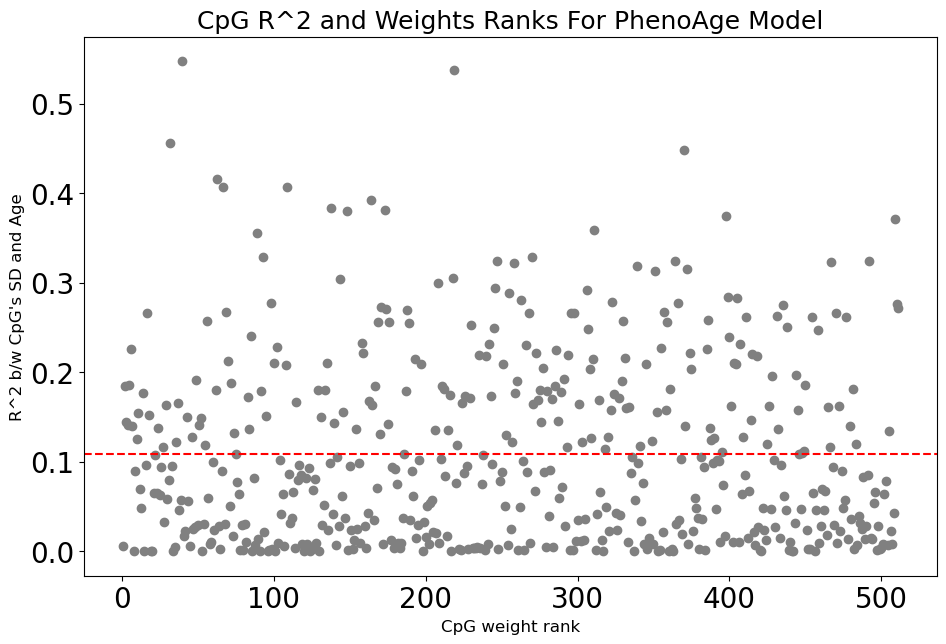

In [100]:
cpg_lst = []
R_square = []
for i in h_com_pheno_sd: 
    x, y = array(h_com_pheno_sd[i]).reshape(-1,1), array(h_com_pheno_sd.reset_index()['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
CpG_R = CpG_R.set_index('cpg')
CpG_R['weight'] = Phenoage_cpg.iloc[1:,:].set_index('CpG')['Univariate Age Correlation']
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,512).tolist()
plt.figure(figsize=(11, 7))
plt.scatter(CpG_R['rank'], 
            CpG_R['R square'], color = 'gray')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CpG R^2 and Weights Ranks For PhenoAge Model", fontsize=18)
plt.xlabel('CpG weight rank', fontsize=12)
plt.ylabel("R^2 b/w CpG's SD and Age", fontsize=12)
plt.axhline(CpG_R['R square'].mean(),color = 'r',linestyle='dashed')
plt.show()



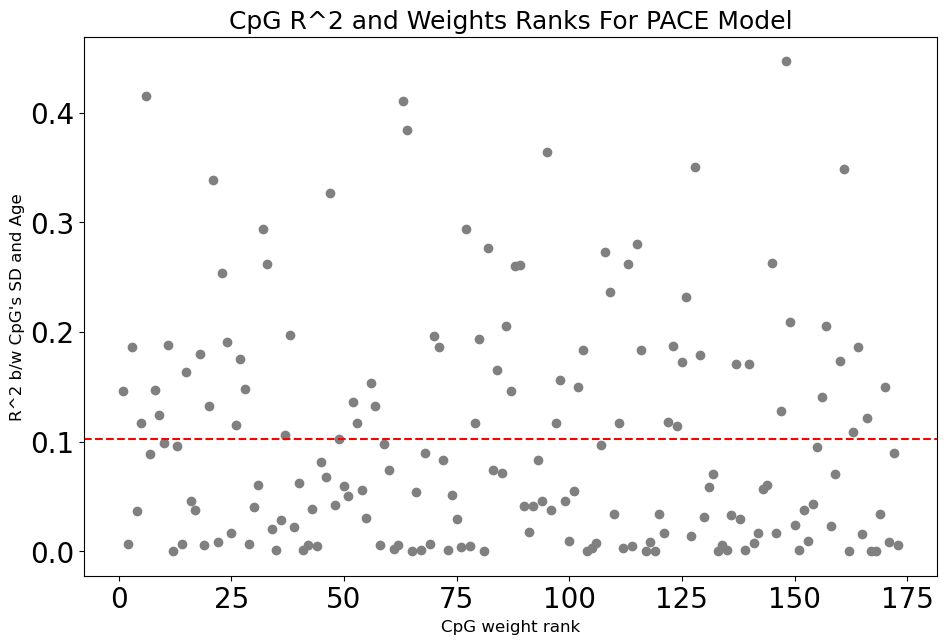

In [102]:
cpg_lst = []
R_square = []
for i in h_com_pace_sd: 
    x, y = array(h_com_pace_sd[i]).reshape(-1,1), array(h_com_pace_sd.reset_index()['Age']).reshape(-1,1)
    model.fit(x, y)
    #calculate R-squared of regression model
    r_squared = model.score(x, y)
    cpg_lst.append(i)
    R_square.append(r_squared)
CpG_R = pd.DataFrame(data={'cpg': cpg_lst, 'R square': R_square})
CpG_R = CpG_R.set_index('cpg')
CpG_R['weight'] = PACEcpgs.set_index('cpg')['coefficient']
CpG_R = CpG_R.sort_values(by = 'weight', ascending=False)
CpG_R['rank'] = np.arange(1,174).tolist()
plt.figure(figsize=(11, 7))
plt.scatter(CpG_R['rank'], 
            CpG_R['R square'], color = 'gray')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CpG R^2 and Weights Ranks For PACE Model", fontsize=18)
plt.xlabel('CpG weight rank', fontsize=12)
plt.ylabel("R^2 b/w CpG's SD and Age", fontsize=12)
plt.axhline(CpG_R['R square'].mean(),color = 'r',linestyle='dashed')
plt.show()



In [227]:
p_han = pd.DataFrame(pd.np.empty((63,2)))
for i in range(0,63):
    p_han.iloc[i, 0] = h_com_han_sd.columns[i]
    column_i_name = h_com_han_sd.columns[i]
    p_han.iloc[i, 1] = np.corrcoef(h_com_han_sd[column_i_name], h_com_han_sd.reset_index()['Age'])[0,1]
# p = pd.DataFrame(list(zip(i_lst, corrcoef_lst)), columns = ["cpg", "values"])
p_han = p_han.set_axis(['CpG', 'Age_Correlation'], axis='columns').set_index('CpG')

han_coe_df = p_han.T.append(hannum_cpg_pub.set_index('Marker')['Coefficient'].T).dropna(axis=1).T
han_coe_df_rank = han_coe_df.sort_values(by='Coefficient', ascending=False)
han_coe_df_rank['rank'] = np.arange(1,64).tolist()



/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/726287055.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  han_coe_df = p_han.T.append(hannum_cpg_pub.set_index('Marker')['Coefficient'].T).dropna(axis=1).T


In [10]:
# anor = anor[anor['Age']>24]
# arth = arth[arth['Age']>24]
# down_nor = down_nor[down_nor['Age']>24]
# down_dis = down_dis[down_dis['Age']>24]
# ms_nor = ms_nor[ms_nor['Age']>24]
# ms_dis = ms_dis[ms_dis['Age']>24]
# ibs_nor = ibs_nor[ibs_nor['Age']>24]
# ibs_dis = ibs_dis[ibs_dis['Age']>24]
# park = park[park['Age']>24]
# parknor = parknor[parknor['Age']>24]

In [11]:
hiv = hiv[hiv['Age']>24]

In [16]:
healthy_all_std = pd.DataFrame(data={'young_std': combine_healthy_common[
    combine_healthy_common['Age'].between(25, 28,inclusive = 'both')].std(), 
                        'old_std': combine_healthy_common[combine_healthy_common['Age']>67].std(), 
                        'young_mean': combine_healthy_common[combine_healthy_common
                                                             ['Age'].between(25, 28,inclusive = 'both')].mean(),
                        'old_mean': combine_healthy_common[combine_healthy_common['Age']>67].mean()})
all_noisy = healthy_all_std[(healthy_all_std['young_std'] < healthy_all_std['old_std'])]
all_noisy['O-Y/O'] = (all_noisy['old_mean']-all_noisy['young_mean'])/all_noisy['old_mean']
all_noisy0001= all_noisy[all_noisy['O-Y/O'].between(-0.001, 0.001,inclusive = 'both')]
hetero_mei_CpG = all_noisy0001.index.to_list()
# b/w 25 and 28 yrs old 
combine_healthy_common[combine_healthy_common['Age'].between(25, 28,inclusive = 'both')]
# above age 28
combine_healthy_common_28 = combine_healthy_common[combine_healthy_common['Age']>28]
p = pd.DataFrame(pd.np.empty((1816,2)))
for i in range(combine_healthy_common[hetero_mei_CpG].shape[1]):
    p.iloc[i, 0] = combine_healthy_common[hetero_mei_CpG].columns[i]
    column_i_name = combine_healthy_common[hetero_mei_CpG].columns[i]
    p.iloc[i, 1] = np.corrcoef(combine_healthy_common[hetero_mei_CpG][column_i_name], combine_healthy_common["Age"])[0,1]
# p = pd.DataFrame(list(zip(i_lst, corrcoef_lst)), columns = ["cpg", "values"])
p = p.set_axis(['CpG', 'Coe'], axis='columns')  

In [13]:
all_noisy = healthy_all_std[(healthy_all_std['young_std'] < healthy_all_std['old_std'])]
all_noisy['O-Y/O'] = (all_noisy['old_mean']-all_noisy['young_mean'])/all_noisy['old_mean']
all_noisy0001= all_noisy[all_noisy['O-Y/O'].between(-0.001, 0.001,inclusive = 'both')]
hetero_mei_CpG = all_noisy0001.index.to_list()

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/2253066091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_noisy['O-Y/O'] = (all_noisy['old_mean']-all_noisy['young_mean'])/all_noisy['old_mean']


In [14]:
# b/w 25 and 28 yrs old 
combine_healthy_common[combine_healthy_common['Age'].between(25, 28,inclusive = 'both')]
# above age 28
combine_healthy_common_28 = combine_healthy_common[combine_healthy_common['Age']>28]

In [15]:
p = pd.DataFrame(pd.np.empty((1816,2)))
for i in range(combine_healthy_common[hetero_mei_CpG].shape[1]):
    p.iloc[i, 0] = combine_healthy_common[hetero_mei_CpG].columns[i]
    column_i_name = combine_healthy_common[hetero_mei_CpG].columns[i]
    p.iloc[i, 1] = np.corrcoef(combine_healthy_common[hetero_mei_CpG][column_i_name], combine_healthy_common["Age"])[0,1]
# p = pd.DataFrame(list(zip(i_lst, corrcoef_lst)), columns = ["cpg", "values"])
p = p.set_axis(['CpG', 'Coe'], axis='columns')  

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/1191780635.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  p = pd.DataFrame(pd.np.empty((1816,2)))


In [443]:
combine_h_sort_age = parknor[most_reg_y].sort_values(by=['Age'])
combine_h_sort_age['age_group'] = pd.cut(
    parknor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
sumSD_per_age_df = combine_h_sort_age.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1).to_frame()
# sumSD_per_age_df = combine_h_sort_age.groupby('age_group').std().dropna(axis=0)

combine_d_sort_age = park[most_reg_y].sort_values(by=['Age'])
combine_d_sort_age['age_group'] = pd.cut(
    park['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
sumSD_per_age_df_d = combine_d_sort_age.groupby('age_group').std().dropna(axis=0).drop(columns='Age').sum(axis=1).to_frame()
# sumSD_per_age_df_d = combine_d_sort_age.groupby('age_group').std().dropna(axis=0)


In [61]:
mean_per_age_h = combine_h_sort_age.groupby('age_group').mean().drop(columns='Age').dropna()

In [39]:
sd_by_mean_460 = ((combine_h_sort_age.std(axis=0))/(combine_h_sort_age.mean(axis=0))).to_frame()
sd_by_mean_460[sd_by_mean_460[0]>0.3] 

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/2349234830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd_by_mean_460 = ((combine_h_sort_age.std(axis=0))/(combine_h_sort_age.mean(axis=0))).to_frame()


,0
cg08137948,0.305472
cg09606941,0.623573
cg17942639,0.696848
cg16239482,0.375332
cg26570901,0.344014
cg01614020,0.585054
cg19456540,0.551537
cg22996004,0.321883
cg05082965,0.322178
Age,0.304557


In [87]:
combine_h_sort_age_10 = combine_healthy_common[least_reg].sort_values(by=['Age'])
combine_h_sort_age_10['age_group'] = pd.cut(
    combine_healthy_common['Age'], bins=[24, 34, 44, 54, 64, 74, 84, 100], 
                           labels=['25-34', '35-44', '45-54','55-64', '65-74', '75-84', '>84'])
sumSD_df_10_LR = combine_h_sort_age_10.drop(columns='Age').groupby('age_group').std().dropna(axis=0).mean(axis=1).to_frame()

combine_d_sort_age_10 = combine_dis_nohiv[least_reg].sort_values(by=['Age'])
combine_d_sort_age_10['age_group'] = pd.cut(
    combine_dis_nohiv['Age'], bins=[24, 34, 44, 54, 64, 74, 84, 100], 
                           labels=['25-34', '35-44', '45-54','55-64', '65-74', '75-84', '>84'])
sumSD_df_d_10_LR = combine_d_sort_age_10.drop(columns='Age').groupby('age_group').std().dropna(axis=0).mean(axis=1).to_frame()


In [131]:
down_nor_sort_age = down_nor[most_reg_y].sort_values(by=['Age'])
down_nor_sort_age['age_group'] = pd.cut(
    down_nor['Age'], bins=[0, 29, 40, 100], 
                           labels=['<30', '30-40', '>40'])
sumSD_df_down_nor = down_nor_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).std(axis=1).to_frame()

down_dis_sort_age = down_dis[most_reg_y].sort_values(by=['Age'])
down_dis_sort_age['age_group'] = pd.cut(
    down_dis['Age'], bins=[0, 29, 40, 100], 
                           labels=['<30', '30-40', '>40'])
sumSD_df_down_dis = down_dis_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).std(axis=1).to_frame()


In [126]:
stats.ttest_ind(combine_h_sort_age_10[combine_h_sort_age_10['age_group'] == 
                                      '55-64'].drop(columns='Age').sum(axis=1), 
                combine_d_sort_age_10[combine_d_sort_age_10['age_group'] == 
                                      '55-64'].drop(columns='Age').sum(axis=1), alternative='two-sided')


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/2412122501.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats.ttest_ind(combine_h_sort_age_10[combine_h_sort_age_10['age_group'] ==
/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/2412122501.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combine_d_sort_age_10[combine_d_sort_age_10['age_group'] ==


Ttest_indResult(statistic=0.5910525573926366, pvalue=0.5548302458309831)

In [135]:
down_dis_sort_age.drop(columns='Age').groupby('age_group').std().mean(axis=1)

age_group
<30      0.012203
30-40    0.013525
>40      0.004826
dtype: float64

In [130]:
sumSD_df_down_nor.T.append(sumSD_df_down_dis.T)

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/1688292804.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumSD_df_down_nor.T.append(sumSD_df_down_dis.T)


age_group,<30,30-40,>40
0,0.014902,0.012551,0.015839
0,0.012203,0.013525,0.004826


In [132]:
sumSD_df_down_nor.T.append(sumSD_df_down_dis.T)

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/1688292804.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumSD_df_down_nor.T.append(sumSD_df_down_dis.T)


age_group,<30,30-40,>40
0,0.005368,0.005489,0.001801
0,0.003863,0.003046,0.004139


In [107]:
sumSD_df_10_LR.T.append(sumSD_df_d_10_LR.T)

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/2614030635.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumSD_df_10_LR.T.append(sumSD_df_d_10_LR.T)


age_group,25-34,35-44,45-54,55-64,65-74,75-84,>84
0,0.001220,0.000928,0.000937,0.004841,0.005389,0.007083,0.011790
0,0.000985,0.002364,0.002674,0.001609,0.005406,0.007623,0.005733


In [361]:
combine_healthy_common460 = combine_healthy_common[coe_002005]

In [362]:
comb_h_460mean = combine_healthy_common460.mean(axis=0).to_frame()

In [363]:
comb_h_460mean = combine_healthy_common460.mean(axis=0).to_frame()comb_h_460sd = combine_healthy_common460.std(axis=0).to_frame()

In [393]:
comb_h_460sd_young = combine_healthy_common460[combine_healthy_common460['Age'].between(25,28,inclusive=True)].std(axis=0).to_frame()
most_reg_y = comb_h_460sd_young[comb_h_460sd_young[0]<0.015].T.columns.to_list()


/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_79850/573124127.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  comb_h_460sd_young = combine_healthy_common460[combine_healthy_common460['Age'].between(25,28,inclusive=True)].std(axis=0).to_frame()


In [370]:
def intersection1(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [419]:
most_reg_y.append('Age')

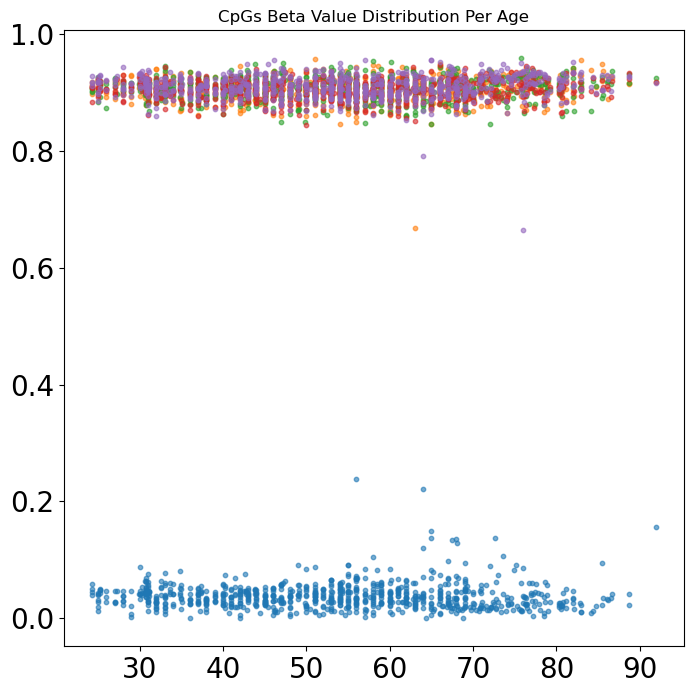

In [100]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title='CpGs Beta Value Distribution Per Age')
for i in most_reg_y:
    ax.scatter(combine_healthy_common460['Age'], combine_healthy_common460[i], s=10, label= i, alpha=0.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [400]:
combine_h_sort_age_10 = combine_healthy_common[most_reg_y].sort_values(by=['Age'])
combine_h_sort_age_10['age_group'] = pd.cut(
    combine_healthy_common['Age'], bins=[24, 34, 44, 54, 64, 74, 84, 100], 
                           labels=['25-34', '35-44', '45-54','55-64', '65-74', '75-84', '>84'])
sumSD_df_10_LR = combine_h_sort_age_10.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()

combine_d_sort_age_10 = combine_dis_nohiv[most_reg_y].sort_values(by=['Age'])
combine_d_sort_age_10['age_group'] = pd.cut(
    combine_dis_nohiv['Age'], bins=[24, 34, 44, 54, 64, 74, 84, 100], 
                           labels=['25-34', '35-44', '45-54','55-64', '65-74', '75-84', '>84'])
sumSD_df_d_10_LR = combine_d_sort_age_10.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()


In [402]:
sumSD_df_10_LR - sumSD_df_d_10_LR

,0
age_group,
25-34,-0.005310
35-44,0.005741
45-54,-0.038140
55-64,0.044403
65-74,0.036165
75-84,-0.027738
>84,0.036634


In [116]:
least_reg = comb_h_460sd[comb_h_460sd[0]>0.1].iloc[:-1,:].T.columns.to_list()
least_reg_mean = comb_h_460mean.T[least_reg].T

In [118]:
least_reg.append('Age')

In [74]:
least_reg

['cg12088417',
 'cg22796025',
 'cg21735741',
 'cg11222703',
 'cg20823529',
 'cg13322072',
 'cg14485877',
 'cg22757362',
 'cg19528830',
 'cg19077165',
 'cg04613452',
 'cg14752227',
 'cg03873518',
 'Age']

In [417]:
most_reg_y = ['cg01614020', 'cg19028499', 'cg06626168', 'cg05184256', 'cg24366087']

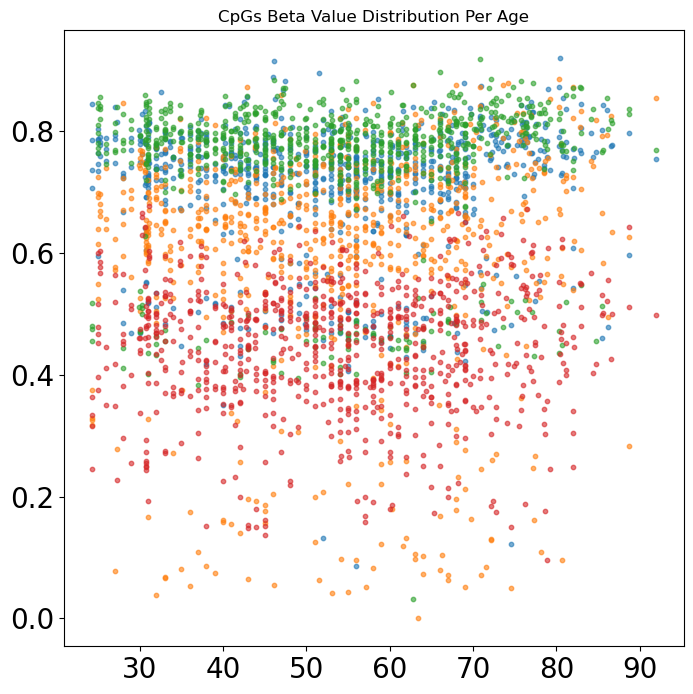

In [108]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title='CpGs Beta Value Distribution Per Age')
for i in least_reg_mean[least_reg_mean[0]<=0.75].T.columns.to_list():
    ax.scatter(combine_healthy_common460['Age'], combine_healthy_common460[i], s=10, label= i, alpha=0.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<AxesSubplot:xlabel='age_group'>

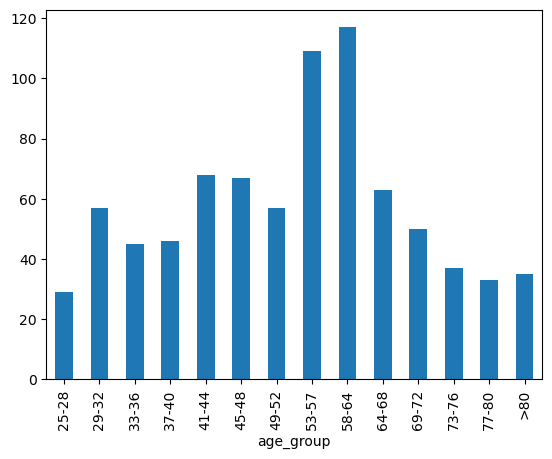

In [168]:
# age distribution of individuals
combine_h_sort_age.drop(columns='Age').groupby('age_group').count()['cg05639522'].plot.bar()

In [34]:
# specific selections
a_all = ['cg09606941', 'cg17942639', 'cg16239482', 'cg01614020', 'cg19456540', 'cg13727849', 'cg22996004', 'cg05082965', 'cg11222703', 'cg26570901', 'cg19528830', 'cg08137948', 'cg25311271', 'cg25600933', 'cg22757362', 'cg19001789', 'cg25997306']
a_all.append('Age')

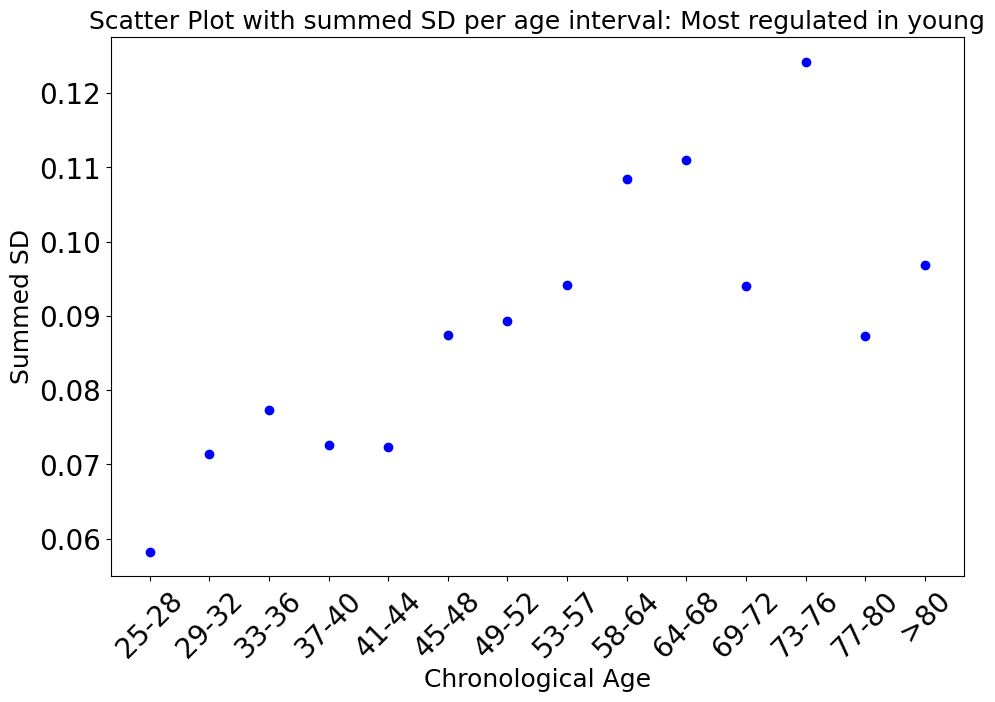

In [125]:
sumSD_per_age_df = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()
x = np.array(np.arange(14))
my_xticks = sumSD_per_age_df.index.to_list()
plt.figure(figsize=(11, 7))
plt.xticks(x, my_xticks)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
x_range = np.linspace(0, 13, 100)
plt.scatter(x, sumSD_per_age_df[0],color = 'b')
#plt.scatter(xd, sumSD_per_age_df_d[0],color = 'r')
plt.title("Scatter Plot with summed SD per age interval: Most regulated in young", fontsize=18)
plt.xlabel('Chronological Age', fontsize=18)
plt.ylabel('Summed SD', fontsize=18)
plt.show()

In [50]:
combine_d_sort_age = combine_healthy_common[['cg25600933', 'Age']].sort_values(by=['Age'])
combine_d_sort_age['age_group'] = pd.cut(
    combine_healthy_common['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_d_sort_age_df = combine_d_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()


In [52]:
combine_d_sort_age = combine_dis_nohiv[['cg25600933', 'Age']].sort_values(by=['Age'])
combine_d_sort_age['age_group'] = pd.cut(
    combine_dis_nohiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
combine_d_sort_age_df = combine_d_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()


In [55]:
combine_h_sort_age_df = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()
combine_d_sort_age_df = combine_d_sort_age.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()


In [364]:
combine_h_noibshiv_sort = combine_healthy_noibshiv[a_all].sort_values(by=['Age'])
combine_h_noibshiv_sort['age_group'] = pd.cut(
    combine_healthy_noibshiv['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])

In [338]:
combine_h_noibshiv_sort = combine_h_noibshiv_sort.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()
combine_dis_noibshiv_sort = combine_dis_noibshiv_sort.drop(columns='Age').groupby('age_group').std().dropna(axis=0).sum(axis=1).to_frame()


In [261]:
combine_h_sort_age['Age'] = combine_h_sort_age['Age'].round()

In [318]:
combine_dis_noibshiv['Age'] = combine_dis_noibshiv['Age'].round()

In [271]:
sum_SD_25cpg_perage = combine_h_sort_age.drop(columns='age_group').groupby('Age').std().dropna(axis=0).sum(axis=1).reset_index('Age')



In [296]:
sum_SD_25cpg_perage_dis = combine_d_common.drop(columns='age_group').groupby('Age').std().dropna(axis=0).sum(axis=1).reset_index('Age')



In [205]:
sumSD_per_age_df8 = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [205]:
sumSD_per_age_d_df8 = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [208]:
sumSD_per_age_df17 = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [222]:
combine_h_sort_age_25 = combine_h_sort_age.drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [ ]:
#combine_dis_common = combine_dis[coe_002005].dropna(axis=0)
combine_dis_common = combine_dis_nohiv[a_all].dropna(axis=0)
#combine_dis_common.set_index('age_group')
combine_d_common = combine_dis_common.sort_values(by=['Age'])
combine_d_common['age_group'] = pd.cut(
    combine_d_common['Age'], bins=[24, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
# SD_per_age_d = combine_d_common.groupby('age_group').std().drop(columns='Age')
# sumSD_per_age_d = combine_d_common.groupby('age_group').std().drop(columns='Age').sum(axis=1)
# sumSD_per_age_d
sumSD_per_age_df_d = combine_d_common1.dropna(axis=0).drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [118]:
combine_d_sort_age = combine_dis[a_all].sort_values(by=['Age'])
combine_d_sort_age['age_group'] = pd.cut(
    combine_dis['Age'], bins=[24, 28, 38, 48, 58, 68, 80, 100], 
                           labels=['25-28', '29-38', '39-48','49-58', 
                                   '59-68','69-80', '>80'])
combine_d_sort_age = combine_d_sort_age.dropna(axis=0)

In [320]:
mean_18_cpg = combine_h_sort_age.drop(columns = 'Age').mean().to_frame()
# 0.0 for one group clearly unmethlyated, b/2 0.1 and 0.3 into second group, above 0.3 groups
mean_18_cpg

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_87040/337099036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_18_cpg = combine_h_sort_age.drop(columns = 'Age').mean().to_frame()


,0
cg09606941,0.043246
cg17942639,0.034979
cg16239482,0.086795
cg01614020,0.038005
cg19456540,0.043006
cg13727849,0.064605
cg22996004,0.124136
cg05082965,0.064977
cg11222703,0.604769
cg26570901,0.252082


Most regulated in young: cpg below 0.015 in ages before 45 years old

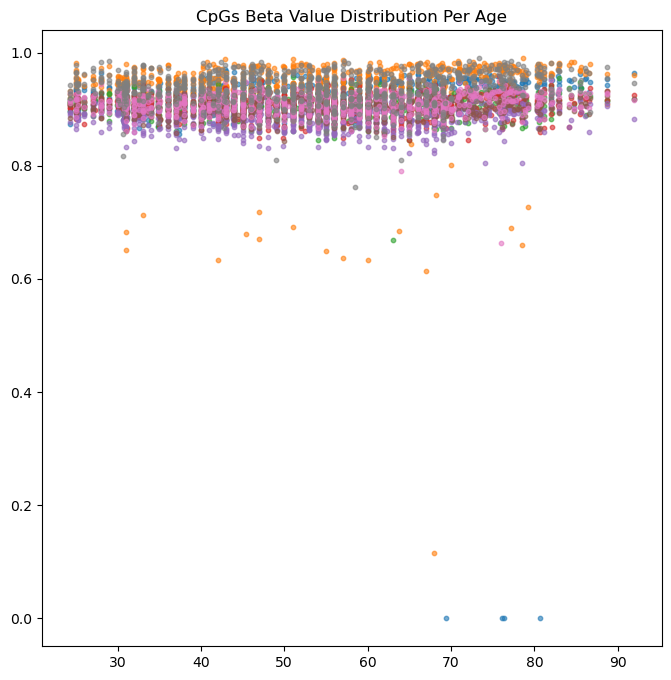

In [194]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title='CpGs Beta Value Distribution Per Age')
for i in ['cg09521490', 'cg20398123', 'cg19028499', 'cg06626168', 'cg23183348', 'cg05184256', 'cg24366087', 'cg24979233']:
    ax.scatter(combine_h_sort_age['Age'], combine_h_sort_age[i], s=10, label= i, alpha=0.6)

Less regulated young and old: cpg above 0.3 in ALL age ranges

In [182]:
mean_18_cpg.loc[mean_18_cpg[0]<0.1, 'status'] = 'unmet'
mean_18_cpg.loc[mean_18_cpg[0].between(0.1,0.3, inclusive='both'),'status'] = 'half_met'
mean_18_cpg.loc[mean_18_cpg[0]>0.3, 'status'] = 'met'


(0.0, 1.0)

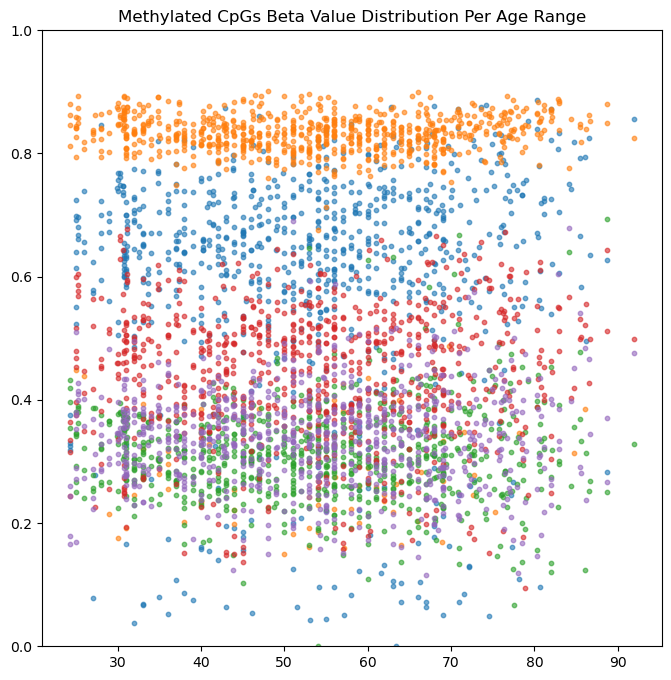

In [188]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, title='Methylated CpGs Beta Value Distribution Per Age Range')
for i in mean_18_cpg.loc[mean_18_cpg['status']=='met'].T.columns:
    ax.scatter(combine_h_sort_age['Age'], combine_h_sort_age[i], s=10, label= i, alpha=0.6)
plt.ylim((0,1))

In [521]:
combine_h_sort_age = combine_healthy_common[coe_002005].sort_values(by=['Age'])
# combine_h_sort_age['age_group'] = pd.cut(
#     combine_healthy_common['Age'], bins=[8, 24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
#                            labels=['9-24', '25-28', '29-32', '33-36', '37-40', '41-44', '45-48',
#                                    '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
#                                    '77-80', '>80'])
combine_h_sort_age['age_group'] = pd.cut(
    combine_healthy_common['Age'], bins=[8, 24, 28, 38, 48, 58, 68, 80, 100], 
                           labels=['<25', '25-28', '29-38', '39-48','49-58', 
                                   '59-68','69-80', '>80'])

In [156]:
most_reg_y

['cg01614020', 'cg19028499', 'cg06626168', 'cg05184256', 'cg24366087', 'Age']

In [106]:
anor1 = anor[coe_002005].sort_values(by=['Age'])
anor1['age_group'] = pd.cut(
    anor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
arth1 = arth[coe_002005].sort_values(by=['Age'])
arth1['age_group'] = pd.cut(
    arth['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
anor1_sum_sd = anor1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')
arth1_sum_sd = arth1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')

In [107]:
parknor1 = parknor[coe_002005].sort_values(by=['Age'])
parknor1['age_group'] = pd.cut(
    parknor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
park1 = park[coe_002005].sort_values(by=['Age'])
park1['age_group'] = pd.cut(
    park['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])
parknor_sum_sd = parknor1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')
park_sum_sd = park1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')

In [108]:
ibs_nor1 = ibs_nor[coe_002005].sort_values(by=['Age'])
ibs_nor1['age_group'] = pd.cut(
    ibs_nor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_dis1 = ibs_dis[coe_002005].sort_values(by=['Age'])
ibs_dis1['age_group'] = pd.cut(
    ibs_dis['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ibs_nor_sum_sd = ibs_nor1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')
ibs_dis_sum_sd = ibs_dis1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')

In [109]:
ms_nor1 = ms_nor[coe_002005].sort_values(by=['Age'])
ms_nor1['age_group'] = pd.cut(
    ms_nor['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=['25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ms_dis1 = ms_dis[coe_002005].sort_values(by=['Age'])
ms_dis1['age_group'] = pd.cut(
    ms_dis['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
ms_nor_sum_sd = ms_nor1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')
ms_dis_sum_sd = ms_dis1.groupby('age_group').std().dropna(axis=0).drop(columns='Age')

In [123]:
healthy_df = parknor_sum_sd
disease_df = park_sum_sd

In [522]:
combine_d_common['age_group'] = pd.cut(
    combine_d_common['Age'], bins=[32, 36, 40, 44, 48, 52, 54, 56, 60, 64, 68, 72, 76, 80, 100], 
                           labels=['<36', '37-40', '41-44', '45-48',
                                   '49-52', '53-54', '55-56', '57-60', '61-64', '65-68', '69-72', '73-76', 
                                   '77-80', '>80'])

In [147]:
# sample size for each age range
#combine_h_sort_age.groupby('age_group').count()['cg05639522'].plot.bar()

In [524]:
combine_healthy_460_round = combine_healthy_common[coe_002005]
combine_healthy_460_round['Age'] = combine_healthy_460_round['Age'].round()

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_51988/1950929039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_healthy_460_round['Age'] = combine_healthy_460_round['Age'].round()


In [525]:
combine_h_sort_age_sorted = combine_h_sort_age.groupby('age_group').std().dropna(axis=0)

In [526]:
combine_d_sort_age_sorted = combine_d_common.groupby('age_group').std().dropna(axis=0)

In [527]:
combine_h_sort_age_melt= combine_h_sort_age_sorted.T.iloc[:-1,:].melt(var_name='age_group', value_name='Value')

In [528]:
combine_d_sort_age_melt= combine_d_sort_age_sorted.T.iloc[:-1,:].melt(var_name='age_group', value_name='Value')

In [529]:
combine_h_sort_age_melt['status'] = 'healthy'

In [530]:
combine_d_sort_age_melt['status'] = 'disease'

In [ ]:
sumSD_per_age = SD_per_age.sum(axis=1)
sumSD_per_age_df = sumSD_per_age.to_frame()

In [248]:
#combine_dis_common = combine_dis[coe_002005].dropna(axis=0)
combine_dis_common = combine_dis_nohiv[a_all].dropna(axis=0)
#combine_dis_common.set_index('age_group')
combine_d_common = combine_dis_common.sort_values(by=['Age'])
combine_d_common['age_group'] = pd.cut(
    combine_d_common['Age'], bins=[24, 28, 32, 36, 40, 44, 48, 52, 57, 64, 68, 72, 76, 80, 100], 
                           labels=[ '25-28', '29-32', '33-36','37-40', '41-44', '45-48',
                                   '49-52', '53-57', '58-64', '64-68', '69-72', '73-76', 
                                   '77-80', '>80'])
# SD_per_age_d = combine_d_common.groupby('age_group').std().drop(columns='Age')
# sumSD_per_age_d = combine_d_common.groupby('age_group').std().drop(columns='Age').sum(axis=1)
# sumSD_per_age_d

In [249]:
combine_d_common1= combine_d_common

In [250]:
#combine_d_common1['Age'] = combine_d_common1['Age'].round()

In [251]:
# sample size for each age range for combined disease 
sumSD_per_age_df_d = combine_d_common1.dropna(axis=0).drop(columns='Age').groupby('age_group').std().sum(axis=1).to_frame()

In [252]:
len(sumSD_per_age_df_d)

14

In [272]:
combine_h_common1 = combine_healthy_common[a_all]
combine_h_common1['Age'] = combine_healthy_common['Age'].round()

/var/folders/qk/hmvjglyx5t9bs0wc4m04xw140000gn/T/ipykernel_51988/87592244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_h_common1['Age'] = combine_healthy_common['Age'].round()


In [293]:
sumSD_per_age_df = combine_h_common1.groupby('Age').std().dropna(axis=0).sum(axis=1).to_frame()

In [197]:
sumSD_per_age_df460 = sumSD_per_age_df

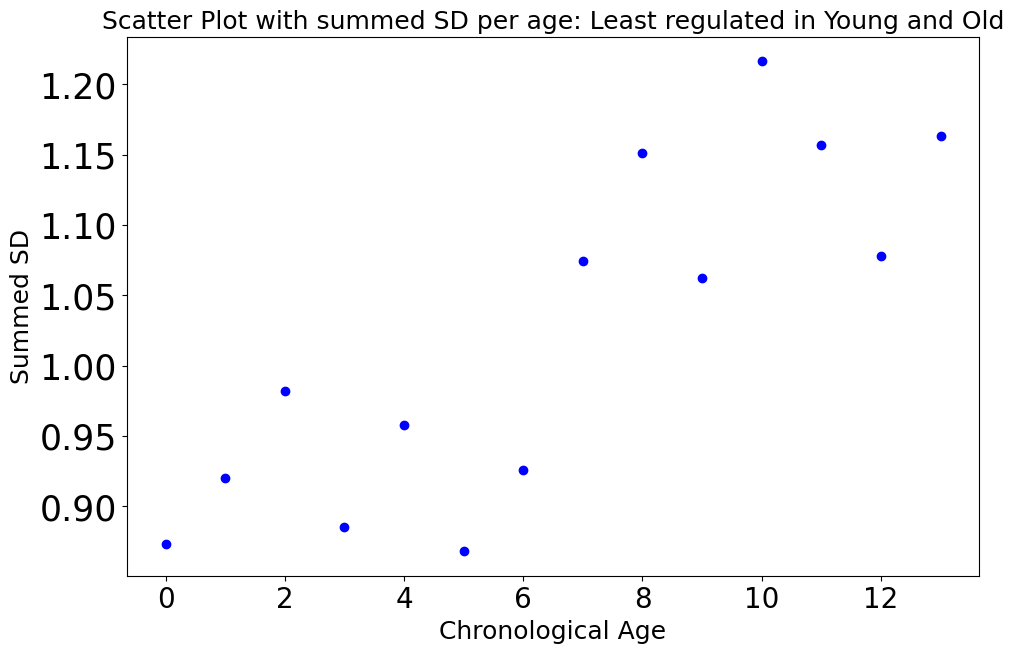

In [214]:
#### condition 1
#sumSD_per_age_df = sumSD_per_age.to_frame()
x = np.array(np.arange(14))
#my_xticks = sumSD_per_age_df.index.to_list()
plt.figure(figsize=(11, 7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
x_range = np.linspace(0, 13, 100)
plt.scatter(x, sumSD_per_age_df17[0],color = 'b')
#plt.scatter(xd, sumSD_per_age_df_d[0],color = 'r')
plt.title("Scatter Plot with summed SD per age: Least regulated in Young and Old", fontsize=18)
plt.xlabel('Chronological Age', fontsize=18)
plt.ylabel('Summed SD', fontsize=18)
plt.show()